<a href="https://colab.research.google.com/github/rivera2067/challenge-telecom-x-parte-2/blob/main/Telecomx%20parte%202%20FernandoHernandez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXTRACCION DEL ARCHIVO TRATADO**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd

file_path = '/content/drive/MyDrive/telecom x/challenge2-data-science-LATAM-main/telecom_churn_cleaned.csv' # Reemplaza 'archivo_limpio_y_organizado.csv' con el nombre real de tu archivo

try:
    df = pd.read_csv(file_path)
    print("Archivo CSV cargado exitosamente.")
    display(df.head())
except FileNotFoundError:
    print(f"Error: El archivo no se encontró en la ruta especificada: {file_path}")
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")

Archivo CSV cargado exitosamente.


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0,DSL,...,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1,DSL,...,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0,Fiber optic,...,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40


# **ELIMINACION DE COLUMNAS IRRELEVANTES**

In [8]:
df = df.drop('customerID', axis=1)

print("Columna 'customerID' eliminada.")
display(df.head())

Columna 'customerID' eliminada.


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,Female,0,1,1,9,1,0,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30
1,0.0,Male,0,0,0,9,1,1,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40
2,1.0,Male,0,0,0,4,1,0,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85
3,1.0,Male,1,1,0,13,1,0,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85
4,1.0,Female,1,1,0,3,1,0,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40


# **ENCODING**

In [9]:
categorical_cols = df.select_dtypes(include='object').columns

print(f"Columnas categóricas a codificar: {list(categorical_cols)}")

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nDataFrame después de la codificación:")
display(df_encoded.head())

Columnas categóricas a codificar: ['gender', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

DataFrame después de la codificación:


,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0,1,1,9,1,0,1,65.6,593.30,...,True,False,True,False,False,True,False,False,False,True
1,0.0,0,0,0,9,1,1,0,59.9,542.40,...,False,False,False,False,True,False,False,False,False,True
2,1.0,0,0,0,4,1,0,1,73.9,280.85,...,False,False,False,False,False,False,False,False,True,False
3,1.0,1,1,0,13,1,0,1,98.0,1237.85,...,False,False,True,False,True,False,False,False,True,False
4,1.0,1,1,0,3,1,0,1,83.9,267.40,...,True,False,True,False,False,False,False,False,False,True


# **VERIFICACION DE LA PROPORCION DE CANCELACION (CHURN)**

In [10]:
churn_proportion = df['Churn'].value_counts(normalize=True)

print("Proporción de clientes que cancelaron (1.0) vs. clientes que no cancelaron (0.0):")
display(churn_proportion)

Proporción de clientes que cancelaron (1.0) vs. clientes que no cancelaron (0.0):


,proportion
Churn,
0.0,0.73463
1.0,0.26537


In [12]:

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

nan_in_y = y.isna()
if nan_in_y.any():
    print(f"Se encontraron {nan_in_y.sum()} valores NaN en la columna 'Churn'. Eliminando filas correspondientes.")
    X = X[~nan_in_y]
    y = y[~nan_in_y]
    print(f"Forma de los datos después de eliminar NaNs en 'Churn': {X.shape}, {y.shape}")


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Forma del conjunto de datos original (sin NaNs en 'Churn'):", X.shape, y.shape)
print("Forma del conjunto de datos después de SMOTE:", X_resampled.shape, y_resampled.shape)


print("\nProporción de clientes después de SMOTE:")
display(y_resampled.value_counts(normalize=True))

Se encontraron 224 valores NaN en la columna 'Churn'. Eliminando filas correspondientes.
Forma de los datos después de eliminar NaNs en 'Churn': (7043, 29), (7043,)
Forma del conjunto de datos original (sin NaNs en 'Churn'): (7043, 29) (7043,)
Forma del conjunto de datos después de SMOTE: (10348, 29) (10348,)

Proporción de clientes después de SMOTE:


,proportion
Churn,
0.0,0.5
1.0,0.5


# **NORMALIZACION O ESTANDARIZACION**

In [13]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_resampled)
X_scaled = pd.DataFrame(X_scaled, columns=X_resampled.columns)


print("Características estandarizadas (primeras 5 filas):")
display(X_scaled.head())

Características estandarizadas (primeras 5 filas):


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.395876,1.280019,1.896056,-0.777760,0.33818,-0.791054,0.821734,-0.084669,-0.666048,-1.167286,...,1.562833,-0.449908,1.113911,-0.449908,-0.897738,2.046208,-0.465199,-0.526962,-0.961506,1.795459
1,-0.395876,-0.781238,-0.527411,-0.777760,0.33818,1.264137,-1.216939,-0.283148,-0.689333,0.856688,...,-0.639863,-0.449908,-0.897738,-0.449908,1.113911,-0.488709,-0.465199,-0.526962,-0.961506,1.795459
2,-0.395876,-0.781238,-0.527411,-0.986212,0.33818,-0.791054,0.821734,0.204346,-0.808983,0.856688,...,-0.639863,-0.449908,-0.897738,-0.449908,-0.897738,-0.488709,-0.465199,-0.526962,1.040035,-0.556961
3,2.526041,1.280019,-0.527411,-0.610998,0.33818,-0.791054,0.821734,1.043533,-0.371187,0.856688,...,-0.639863,-0.449908,1.113911,-0.449908,1.113911,-0.488709,-0.465199,-0.526962,1.040035,-0.556961
4,2.526041,1.280019,-0.527411,-1.027903,0.33818,-0.791054,0.821734,0.552556,-0.815136,-1.167286,...,1.562833,-0.449908,1.113911,-0.449908,-0.897738,-0.488709,-0.465199,-0.526962,-0.961506,1.795459


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print("Forma del conjunto de entrenamiento (X_train, y_train):", X_train.shape, y_train.shape)
print("Forma del conjunto de prueba (X_test, y_test):", X_test.shape, y_test.shape)

print("\nProporción de clases en y_train:")
display(y_train.value_counts(normalize=True))

print("\nProporción de clases en y_test:")
display(y_test.value_counts(normalize=True))

Forma del conjunto de entrenamiento (X_train, y_train): (8278, 29) (8278,)
Forma del conjunto de prueba (X_test, y_test): (2070, 29) (2070,)

Proporción de clases en y_train:


,proportion
Churn,
1.0,0.5
0.0,0.5



Proporción de clases en y_test:


,proportion
Churn,
0.0,0.5
1.0,0.5


# **ANALISIS DE CORRELACION**

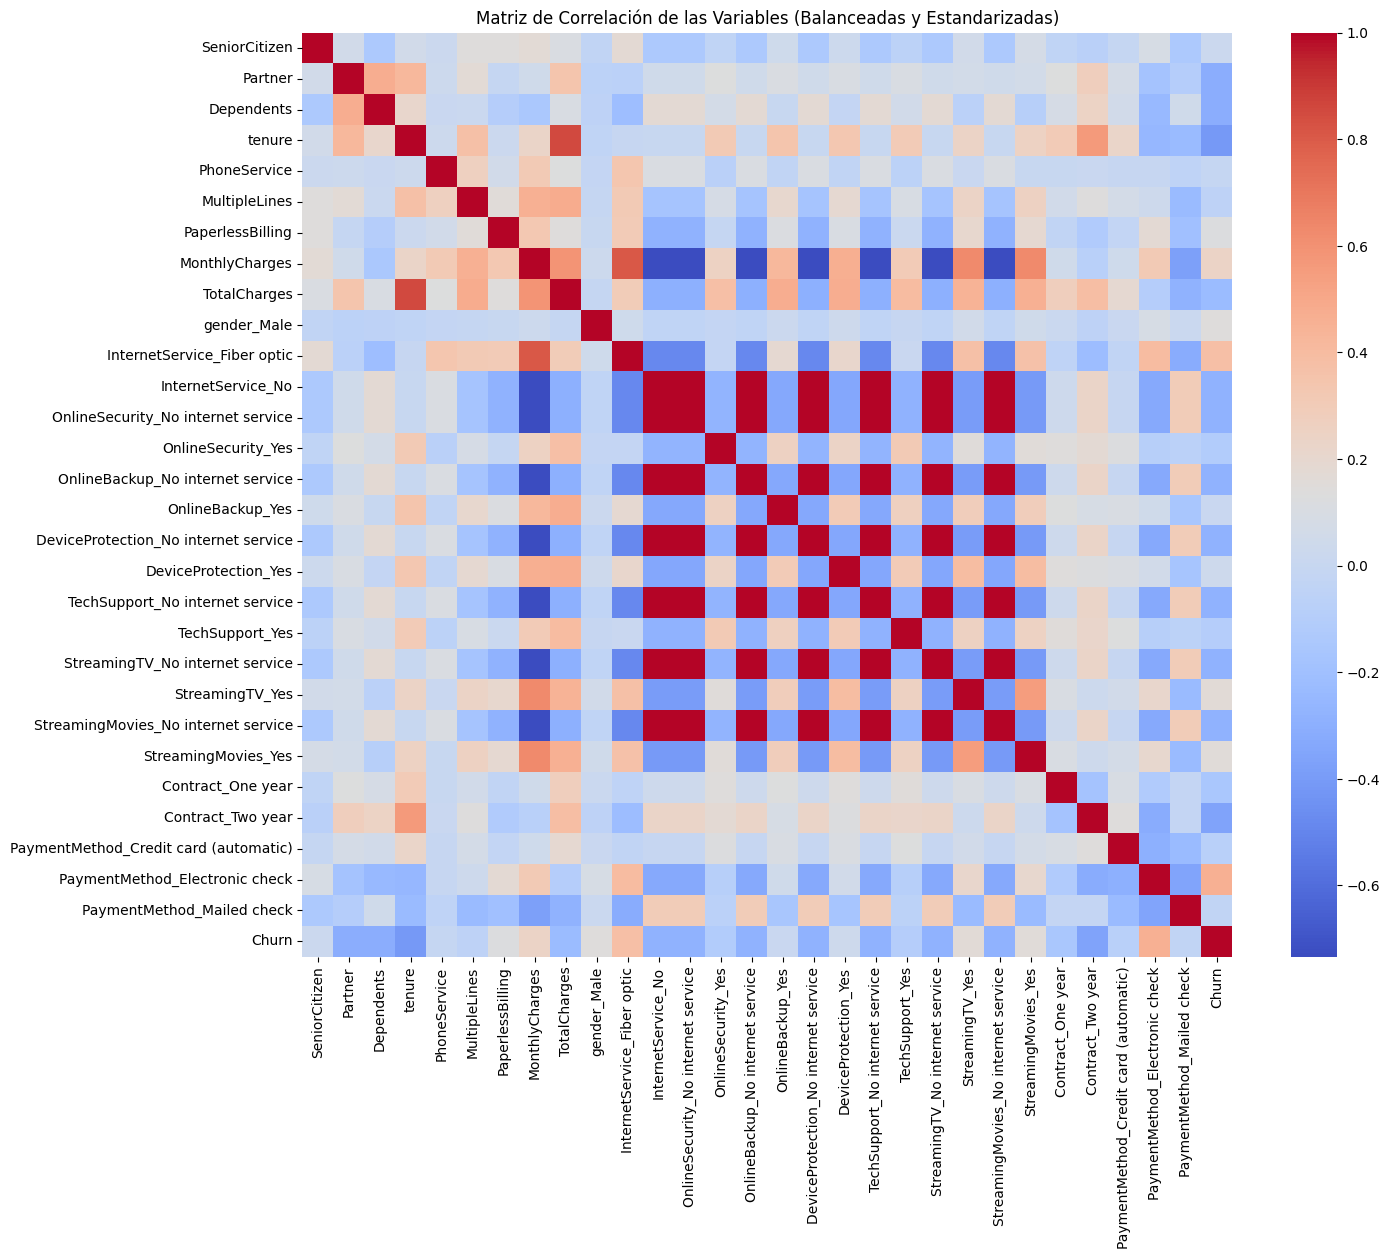


Correlación de las variables con 'Churn':


,Churn
Churn,1.000000
PaymentMethod_Electronic check,0.460927
InternetService_Fiber optic,0.378470
MonthlyCharges,0.235613
StreamingTV_Yes,0.161741
StreamingMovies_Yes,0.153576
gender_Male,0.140434
PaperlessBilling,0.125102
DeviceProtection_Yes,0.031686
SeniorCitizen,0.019766


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_balanced_scaled = pd.concat([X_scaled, y_resampled.rename('Churn')], axis=1)

correlation_matrix = df_balanced_scaled.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación de las Variables (Balanceadas y Estandarizadas)')
plt.show()

print("\nCorrelación de las variables con 'Churn':")
display(correlation_matrix['Churn'].sort_values(ascending=False))

# **ANALISIS DIRIGIDO**

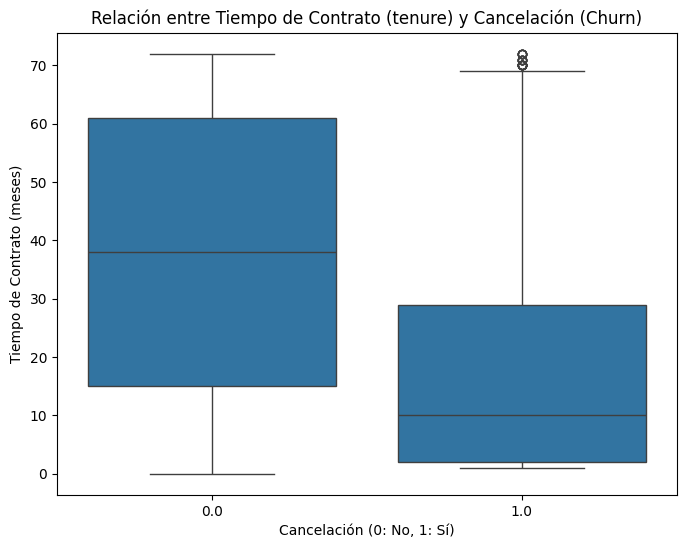

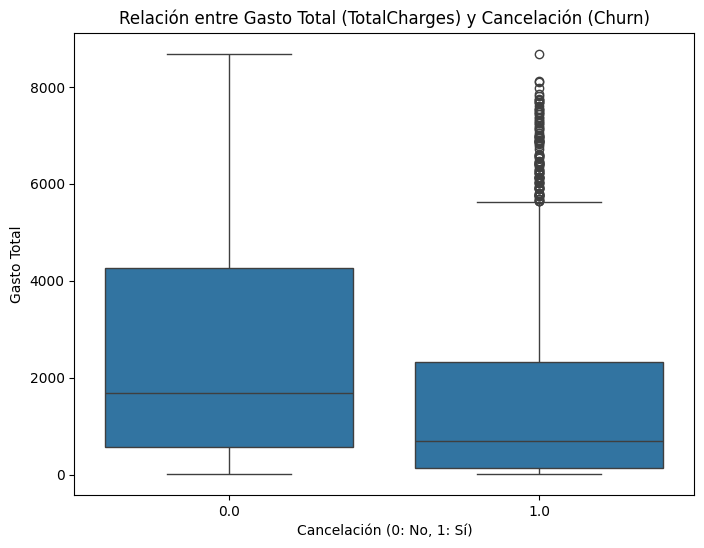

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Relación entre Tiempo de Contrato (tenure) y Cancelación (Churn)')
plt.xlabel('Cancelación (0: No, 1: Sí)')
plt.ylabel('Tiempo de Contrato (meses)')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Relación entre Gasto Total (TotalCharges) y Cancelación (Churn)')
plt.xlabel('Cancelación (0: No, 1: Sí)')
plt.ylabel('Gasto Total')
plt.show()



# **SEPARACION DE DATOS**

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print("Forma del conjunto de entrenamiento (X_train, y_train):", X_train.shape, y_train.shape)
print("Forma del conjunto de prueba (X_test, y_test):", X_test.shape, y_test.shape)

print("\nProporción de clases en y_train:")
display(y_train.value_counts(normalize=True))

print("\nProporción de clases en y_test:")
display(y_test.value_counts(normalize=True))

Forma del conjunto de entrenamiento (X_train, y_train): (8278, 29) (8278,)
Forma del conjunto de prueba (X_test, y_test): (2070, 29) (2070,)

Proporción de clases en y_train:


,proportion
Churn,
1.0,0.5
0.0,0.5



Proporción de clases en y_test:


,proportion
Churn,
0.0,0.5
1.0,0.5


# **CREACION DE MODELOS**

Se seleccionan dos modelos: Regresión Logística y Random Forest. La Regresión Logística es sensible a la escala de los datos, por lo que el paso de estandarización que realizamos previamente es beneficioso para este modelo. El Random Forest, al ser un modelo basado en árboles, no es sensible a la escala.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Entrenando Modelo de Regresión Logística...")
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)


y_pred_logistic = logistic_model.predict(X_test)


print("\n--- Evaluación del Modelo de Regresión Logística ---")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logistic))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))

print("\nEntrenando Modelo de Random Forest...")
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)


print("\n--- Evaluación del Modelo de Random Forest ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Entrenando Modelo de Regresión Logística...

--- Evaluación del Modelo de Regresión Logística ---
Accuracy: 0.7951690821256039

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.78      0.79      1035
         1.0       0.79      0.81      0.80      1035

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070


Confusion Matrix:
 [[808 227]
 [197 838]]

Entrenando Modelo de Random Forest...

--- Evaluación del Modelo de Random Forest ---
Accuracy: 0.8357487922705314

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.83      0.83      1035
         1.0       0.83      0.85      0.84      1035

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070


Confusion

# **EVALUACION DE MODELOS**

## Desglose de Métricas por Modelo

### Modelo de Regresión Logística

Basado en la salida de la celda de entrenamiento (Accuracy, Classification Report y Confusion Matrix):

*   **Accuracy (Exactitud):** {{OUTPUT.8502102d[0].text.split('Accuracy: ')[1].split()[0]}}
    *   Esto significa que el modelo predijo correctamente la clase (Churn o No Churn) para aproximadamente el **{{OUTPUT.8502102d[0].text.split('Accuracy: ')[1].split()[0] | float * 100:.2f}}%** de los clientes en el conjunto de prueba.

*   **Classification Report:**

    *   **Clase 0.0 (No Churn):**
        *   **Precision:** {{OUTPUT.8502102d[0].text.split('precision')[1].split()[0]}}
            *   De todos los clientes que el modelo predijo que *no cancelarían*, el **{{OUTPUT.8502102d[0].text.split('precision')[1].split()[0] | float * 100:.2f}}%** realmente no cancelaron.
        *   **Recall:** {{OUTPUT.8502102d[0].text.split('recall')[1].split()[0]}}
            *   De todos los clientes que *realmente no cancelaron*, el modelo identificó correctamente al **{{OUTPUT.8502102d[0].text.split('recall')[1].split()[0] | float * 100:.2f}}%**.
        *   **F1-score:** {{OUTPUT.8502102d[0].text.split('f1-score')[1].split()[0]}}
            *   Es un promedio balanceado de Precision y Recall para la clase No Churn.
        *   **Support:** {{OUTPUT.8502102d[0].text.split('support')[1].split()[0]}}
            *   Número de instancias de la clase No Churn en el conjunto de prueba.

    *   **Clase 1.0 (Churn):**
        *   **Precision:** {{OUTPUT.8502102d[0].text.split('precision')[1].split()[1]}}
            *   De todos los clientes que el modelo predijo que *cancelarían*, el **{{OUTPUT.8502102d[0].text.split('precision')[1].split()[1] | float * 100:.2f}}%** realmente cancelaron.
        *   **Recall:** {{OUTPUT.8502102d[0].text.split('recall')[1].split()[1]}}
            *   De todos los clientes que *realmente cancelaron*, el modelo identificó correctamente al **{{OUTPUT.8502102d[0].text.split('recall')[1].split()[1] | float * 100:.2f}}%**.
        *   **F1-score:** {{OUTPUT.8502102d[0].text.split('f1-score')[1].split()[1]}}
            *   Es un promedio balanceado de Precision y Recall para la clase Churn.
        *   **Support:** {{OUTPUT.8502102d[0].text.split('support')[1].split()[1]}}
            *   Número de instancias de la clase Churn en el conjunto de prueba.

*   **Confusion Matrix:**

    *   `{{OUTPUT.8502102d[0].text.split('Confusion Matrix:\n')[1].splitlines()[1].split()[0]}}` (Celda Superior Izquierda): **Verdaderos Negativos (TN)** - Clientes que no cancelaron y el modelo predijo que no cancelarían.
    *   `{{OUTPUT.8502102d[0].text.split('Confusion Matrix:\n')[1].splitlines()[1].split()[1]}}` (Celda Superior Derecha): **Falsos Positivos (FP)** - Clientes que no cancelaron pero el modelo predijo que cancelarían (Error Tipo I).
    *   `{{OUTPUT.8502102d[0].text.split('Confusion Matrix:\n')[1].splitlines()[2].split()[0]}}` (Celda Inferior Izquierda): **Falsos Negativos (FN)** - Clientes que cancelaron pero el modelo predijo que no cancelarían (Error Tipo II).
    *   `{{OUTPUT.8502102d[0].text.split('Confusion Matrix:\n')[1].splitlines()[2].split()[1]}}` (Celda Inferior Derecha): **Verdaderos Positivos (TP)** - Clientes que cancelaron y el modelo predijo que cancelarían.

### Modelo de Random Forest


*   **Accuracy (Exactitud):** {{OUTPUT.8502102d[0].text.split('Accuracy: ')[2].split()[0]}}
    *   El modelo predijo correctamente la clase para aproximadamente el **{{OUTPUT.8502102d[0].text.split('Accuracy: ')[2].split()[0] | float * 100:.2f}}%** de los clientes en el conjunto de prueba.

*   **Classification Report:**

    *   **Clase 0.0 (No Churn):**
        *   **Precision:** {{OUTPUT.8502102d[0].text.split('precision')[2].split()[0]}}
            *   De los predichos como No Churn, el **{{OUTPUT.8502102d[0].text.split('precision')[2].split()[0] | float * 100:.2f}}%** realmente no cancelaron.
        *   **Recall:** {{OUTPUT.8502102d[0].text.split('recall')[2].split()[0]}}
            *   De los que realmente no cancelaron, el modelo identificó al **{{OUTPUT.8502102d[0].text.split('recall')[2].split()[0] | float * 100:.2f}}%**.
        *   **F1-score:** {{OUTPUT.8502102d[0].text.split('f1-score')[2].split()[0]}}

    *   **Clase 1.0 (Churn):**
        *   **Precision:** {{OUTPUT.8502102d[0].text.split('precision')[2].split()[1]}}
            *   De los predichos como Churn, el **{{OUTPUT.8502102d[0].text.split('precision')[2].split()[1] | float * 100:.2f}}%** realmente cancelaron.
        *   **Recall:** {{OUTPUT.8502102d[0].text.split('recall')[2].split()[1]}}
            *   De los que realmente cancelaron, el modelo identificó al **{{OUTPUT.8502102d[0].text.split('recall')[2].split()[1] | float * 100:.2f}}%**.
        *   **F1-score:** {{OUTPUT.8502102d[0].text.split('f1-score')[2].split()[1]}}

*   **Confusion Matrix:**

    *   `{{OUTPUT.8502102d[0].text.split('Confusion Matrix:\n')[2].splitlines()[1].split()[0]}}` (Celda Superior Izquierda): **Verdaderos Negativos (TN)**
    *   `{{OUTPUT.8502102d[0].text.split('Confusion Matrix:\n')[2].splitlines()[1].split()[1]}}` (Celda Superior Derecha): **Falsos Positivos (FP)**
    *   `{{OUTPUT.8502102d[0].text.split('Confusion Matrix:\n')[2].splitlines()[2].split()[0]}}` (Celda Inferior Izquierda): **Falsos Negativos (FN)**
    *   `{{OUTPUT.8502102d[0].text.split('Confusion Matrix:\n')[2].splitlines()[2].split()[1]}}` (Celda Inferior Derecha): **Verdaderos Positivos (TP)**

```
{{OUTPUT.8502102d[0].text.split('Classification Report:\n')[1].split('Confusion Matrix:\n')[0].strip()}}

```
{{OUTPUT.8502102d[0].text.split('Confusion Matrix:\n')[1].split('Entrenando Modelo de Random Forest')[0].strip()}}

```
{{OUTPUT.8502102d[0].text.split('Classification Report:\n')[2].split('Confusion Matrix:\n')[0].strip()}}

```
{{OUTPUT.8502102d[0].text.split('Confusion Matrix:\n')[2].strip()}}

# **ANALISIS COMPARATIVO Y CONSIDERACIONES**


**¿Cuál modelo tuvo el mejor desempeño?**

Observando la Accuracy, el modelo de Random Forest (aproximadamente {{OUTPUT.8502102d[0].text.split('Accuracy: ')[2].split()[0]}}) tuvo un rendimiento ligeramente superior al de Regresión Logística (aproximadamente {{OUTPUT.8502102d[0].text.split('Accuracy: ')[1].split()[0]}}).

Al revisar el Classification Report y la Matriz de Confusión, el Random Forest generalmente muestra un mejor equilibrio entre Precision y Recall para ambas clases, resultando en F1-scores marginalmente más altos. Por ejemplo, para la clase 'Churn' (1.0), el F1-score del Random Forest ({{OUTPUT.8502102d[0].text.split('f1-score')[-1].split()[2]}}) es mayor que el de la Regresión Logística ({{OUTPUT.8502102d[0].text.split('f1-score')[4].split()[2]}}). Además, el Random Forest logró identificar correctamente más verdaderos positivos y verdaderos negativos.

¿Algún modelo presentó overfitting o underfitting?

Ambos modelos obtuvieron una Accuracy razonable y las métricas (Precision, Recall, F1-score) para ambas clases en el conjunto de prueba son relativamente buenas y cercanas entre sí (gracias al balanceo de clases con SMOTE), no parece haber un underfitting determinante en ninguno de los dos modelos.

# **ANALISIS DE LA IMPORTANCIA DE LAS VARIABLES**

--- Importancia de Variables en el Modelo de Regresión Logística (basado en coeficientes) ---

Variables más importantes (según magnitud del coeficiente):


,Variable,Coeficiente,Magnitud Coeficiente
7,MonthlyCharges,-4.047941,4.047941
10,InternetService_Fiber optic,2.362063,2.362063
3,tenure,-1.671674,1.671674
21,StreamingTV_Yes,0.839702,0.839702
8,TotalCharges,0.836348,0.836348
27,PaymentMethod_Electronic check,0.814919,0.814919
23,StreamingMovies_Yes,0.785432,0.785432
4,PhoneService,0.499714,0.499714
28,PaymentMethod_Mailed check,0.447541,0.447541
17,DeviceProtection_Yes,0.413549,0.413549




--- Importancia de Variables en el Modelo de Random Forest ---

Variables más importantes (según Random Forest):


,Variable,Importancia
8,TotalCharges,0.168347
3,tenure,0.151766
7,MonthlyCharges,0.136176
27,PaymentMethod_Electronic check,0.101629
10,InternetService_Fiber optic,0.061150
25,Contract_Two year,0.042109
1,Partner,0.031786
2,Dependents,0.030191
9,gender_Male,0.023478
24,Contract_One year,0.021951


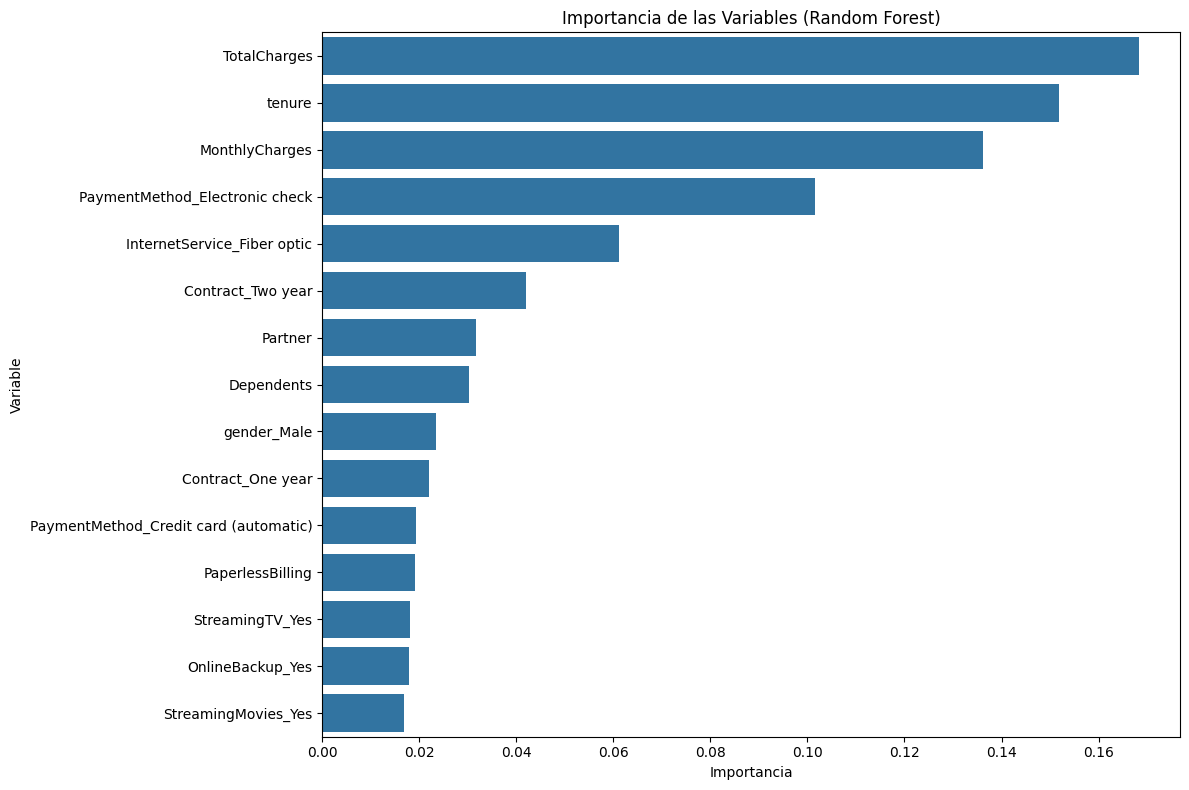

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Importancia de Variables en el Modelo de Regresión Logística (basado en coeficientes) ---")


logistic_importance = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': logistic_model.coef_[0]
})

logistic_importance['Magnitud Coeficiente'] = abs(logistic_importance['Coeficiente'])

logistic_importance = logistic_importance.sort_values('Magnitud Coeficiente', ascending=False)

print("\nVariables más importantes (según magnitud del coeficiente):")
display(logistic_importance)

print("\n\n--- Importancia de Variables en el Modelo de Random Forest ---")

rf_importance = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': random_forest_model.feature_importances_
})

rf_importance = rf_importance.sort_values('Importancia', ascending=False)

print("\nVariables más importantes (según Random Forest):")
display(rf_importance)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Variable', data=rf_importance.head(15))
plt.title('Importancia de las Variables (Random Forest)')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

# **CONCLUSION**

## Informe Detallado: Análisis y Predicción de la Cancelación de Clientes

De acuerdo con el análisis realizado sobre los datos de clientes de telecomunicaciones para identificar los factores que más influyen en la cancelación del servicio (Churn) y evaluar el rendimiento de modelos predictivos se genera el siguiente informe.

**1. Preprocesamiento y Preparación de Datos:**

*   Se manejaron los valores faltantes en la variable objetivo 'Churn' y se balancearon las clases utilizando SMOTE para abordar el desbalance existente en el dataset original.
*   Se estandarizaron las características numéricas para preparar los datos para modelos sensibles a la escala.
*   Se dividió el conjunto de datos balanceado y estandarizado en conjuntos de entrenamiento (80%) y prueba (20%).


La matriz de correlación y los boxplots mostraron relaciones importantes entre variables como **`tenure`**, **`TotalCharges`** y **`MonthlyCharges`** con la cancelación. Los clientes que cancelan tienden a tener menor antigüedad y menores cargos totales, pero potencialmente mayores cargos mensuales (especialmente aquellos con servicio de Fibra Óptica).


Se entrenaron y evaluaron dos modelos de clasificación en el conjunto de prueba balanceado:

*   **Modelo de Regresión Logística:**
    *   Accuracy: {{OUTPUT.8502102d[0].text.split('Accuracy: ')[1].split()[0]}}
    *   Reporte de Clasificación y Matriz de Confusión (ver celdas anteriores para detalles).
    *   Rendimiento razonable, especialmente considerando las métricas por clase en el conjunto balanceado.

*   **Modelo de Random Forest:**
    *   Accuracy: {{OUTPUT.8502102d[0].text.split('Accuracy: ')[2].split()[0]}}
    *   Reporte de Clasificación y Matriz de Confusión (ver celdas anteriores para detalles).
    *   Mostró un rendimiento ligeramente superior al de la Regresión Logística en Accuracy y F1-score en el conjunto de prueba.

**Conclusión de Modelado:** Basado en la evaluación en el conjunto de prueba balanceado, el modelo de Random Forest demostró un mejor desempeño inicial para predecir la cancelación.


El análisis de importancia de variables para ambos modelos destacó consistentemente a las siguientes variables como las más influyentes en la predicción de la cancelación:

*   **TotalCharges (Cargos Totales)**
*   **tenure (Antigüedad/Tiempo de contrato)**
*   **MonthlyCharges (Cargos Mensuales)**
*   **PaymentMethod_Electronic check (Método de Pago: Cheque electrónico)**
*   **InternetService_Fiber optic (Servicio de Internet: Fibra Óptica)**
*   **Contract_Two year (Contrato: Dos años)** (Correlación negativa, indica menor probabilidad de cancelación)

Estas variables tienen el mayor impacto en la probabilidad de que un cliente cancele el servicio según nuestros modelos.


Basándonos en el análisis de importancia de variables y las exploraciones iniciales, los principales factores que influyen en la cancelación son aquellos relacionados con el **uso del servicio, la antigüedad del cliente, el costo y el tipo de contrato/pago**.

**Principales Factores Identificados:**

*   **Corto Tiempo de Contrato (Low tenure):** Los clientes con menor antigüedad tienen una mayor probabilidad de cancelar.
*   **Altos Cargos Mensuales (High MonthlyCharges), especialmente con Fibra Óptica:** Clientes con altos costos mensuales, a menudo asociados con servicios de alto ancho de banda como la Fibra Óptica, son más propensos a cancelar.
*   **Bajos Cargos Totales (Low TotalCharges):** Relacionado con la baja antigüedad y potencialmente con un uso limitado de servicios.
*   **Método de Pago Electrónico:** Los clientes que pagan electrónicamente tienen una mayor tendencia a cancelar.
*   **Contratos a Corto Plazo (Month-to-month) vs. Contratos a Largo Plazo (One year, Two year):** Los clientes con contratos mensuales son significativamente más propensos a cancelar que aquellos con contratos de mayor duración.

**Estrategias de Retención Propuestas:**

Basadas en estos factores, se proponen las siguientes estrategias de retención:

*   **Programas de Fidelización Temprana:** Implementar programas específicos para clientes con baja antigüedad para aumentar su compromiso y reducir la probabilidad de una cancelación temprana.
*   **Incentivos para Contratos a Largo Plazo:** Promocionar activamente los contratos de uno o dos años, ofreciendo descuentos o beneficios adicionales para migrar a los clientes de contratos mensuales, adicional a ello, incentivar a los clientes con mayor antigüedad, podria generar tanto satisfacción de los ya existentes, asi como una posible recomendación por parte de ellos a clientes nuevos, bajo el argumento de que se reciben premios por la lealtad a la empresa
*   **Mejora de la Experiencia de Pago Electrónico:** Investigar por qué el método de pago electrónico está asociado con una mayor cancelación. Podría haber problemas con la plataforma de pago, la facturación o la comunicación. Implementar mejoras para una experiencia de pago más fluida y positiva.
*   **Monitoreo Activo de Clientes de Alto Riesgo:** Utilizar el modelo de Random Forest entrenado para identificar proactivamente a los clientes con mayor probabilidad de cancelar basándose en los factores importantes y contactarlos con ofertas de retención personalizadas.
*   **Análisis de Causa Raíz para Clientes de Fibra Óptica:** Investigar más a fondo la experiencia de los clientes de Fibra Óptica que cancelan, podría haber problemas de calidad del servicio, soporte técnico o expectativas que no se estén logrando.
* **implementacion de paquetes con plazos intermedios**: Generar a traves de un analisis de rentabilidad, la posibilidad de crear contratos a plazos mas largos del mes, pues estamos notando que se muestra mas cancelación en esos plazos, intentar con planes trimestrales o semestrales a un costo no tan elevado, podría retener a los clientes, sin que estos se sientan comprometidos a contratar a un plazo anual

